https://bitbucket.org/RSE_1987/ssn_inference_numerical_experiments/src/master/

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, draw, show
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def gabor_fn(sigma, theta, Lambda, psi, gamma, L):
    sigma_x = sigma
    sigma_y = sigma / gamma

    # Image
    n_sigmas = 3
    
    xmax = sigma * n_sigmas
    ymax = sigma * n_sigmas
    xmin = -xmax
    ymin = -ymax
    x_ticks = np.linspace(xmin, xmax, L)
    y_ticks = np.linspace(ymin, ymax, L)
    
    x, y = np.meshgrid(x_ticks, y_ticks)
    # Rotation 
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    
    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    
    #gb = np.cos(2 * np.pi / Lambda * x_theta + psi) # Full field
    gb = gb / np.linalg.norm(gb)
    return gb

In [3]:
def mat_plot(M,Title,scale):
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 1, height_ratios=[1,1])
    ax=fig.add_subplot(gs[0,0])
    ax.set_title(Title, fontsize=20)
    im=ax.imshow(M, interpolation='nearest', vmin=-scale,vmax=scale, cmap=plt.cm.RdBu)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.5])
    fig.colorbar(im, cax=cbar_ax)
    fig.savefig(Title +'.png')

In [4]:
def plot_filters(filters):
    n_filters = len(filters)
    n_columns = 4
    n_rows = int(n_filters / n_columns)
    
    print(n_rows)
    print(n_columns)
    
    fig, axs = plt.subplots(n_rows,n_columns, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.suptitle("Filters", fontsize=20)
    fig.subplots_adjust(hspace = .4, wspace=.001, top = 0.8)
    scale = np.amax(np.abs(filters))
    axs = axs.ravel()

    for i in range(n_filters):

        axs[i].imshow(filters[i], interpolation='nearest',
                        vmin=-scale, vmax=scale, cmap=plt.cm.bwr)
        axs[i].set_title(str(i))
        axs[i].axis('off')
    
            
    fig.savefig('4_filters_16_x_16.png')

12
4


IndexError: index 48 is out of bounds for axis 0 with size 48

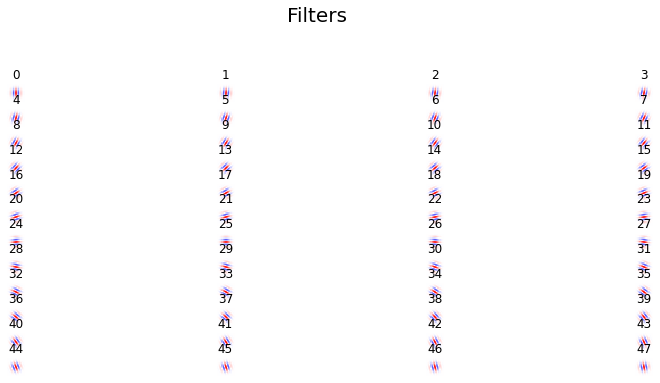

In [5]:
sigma = 1.0
theta = np.pi*0.25
Lambda = 2.0*sigma
psi = 0.0
gamma = 1.0
n_pat = 50
L = 16    

gb = np.empty([n_pat,L,L])

for i in range(n_pat):
    theta = np.pi*i/(1.0*n_pat)
    gb[i]= gabor_fn(sigma, theta, Lambda, psi, gamma, L)

plot_filters(gb)

# Check normalization

filter_array = np.empty([L*L,n_pat])
for j in range(n_pat):
    filter_array[:,j] = np.reshape(gb[j],(L*L))


N = np.empty([n_pat,n_pat])
for i in range(n_pat):
    for j in range(n_pat):
        N[i][j] = np.dot(filter_array[:,i], filter_array[:,j])

print(N)
mat_plot(N,"normalization",1.0)
#np.save('filters_16_x_16', filter_array)